# <center>**Bioseñales y sistemas**
## <center>**Proyecto procesamiento de señales EMG**
## <center>**Seguimiento 1**
#### Maria Alejandra Escobar - C.C 1004425012
#### Juan Manuel Martínez - C.C 1007739919

In [3]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [35]:
import os
import glob
ruta_p = 'EMG_data_for_gestures-master'
i = 0
diccionario_3d = {} 
for carpeta in os.listdir(ruta_p):
    i+=1
    carpeta_path = os.path.join(ruta_p, carpeta)
    archivos = glob.glob(os.path.join(carpeta_path, '*'))
    if len(archivos)>0:
        primer_archivo = archivos[0]
        df = pd.read_csv(primer_archivo, delimiter="\t")
        diccionario_3d[i] = df
#print(diccionario_3d)
print(diccionario_3d[1]['channel1'])
#print(diccionario_3d[12])
#print(diccionario_3d[12].shape)
#plt.plot(diccionario_3d[12]['time'],diccionario_3d[12]['channel1'])

0        0.00001
1        0.00001
2       -0.00001
3       -0.00001
4       -0.00001
          ...   
63191   -0.00001
63192   -0.00001
63193   -0.00001
63194   -0.00001
63195   -0.00001
Name: channel1, Length: 63196, dtype: float64


In [5]:
def tkeo(a):
	# Create two temporary arrays of equal length, shifted 1 sample to the right
	# and left and squared:
	a = np.array(a)
	i = a[1:-1]*a[1:-1]
	j = a[2:]*a[:-2]
	aTkeo = i-j
	return aTkeo

	# Calculate the difference between the two temporary arrays:
	

[2.e-10 2.e-10 0.e+00 ... 0.e+00 0.e+00 0.e+00]


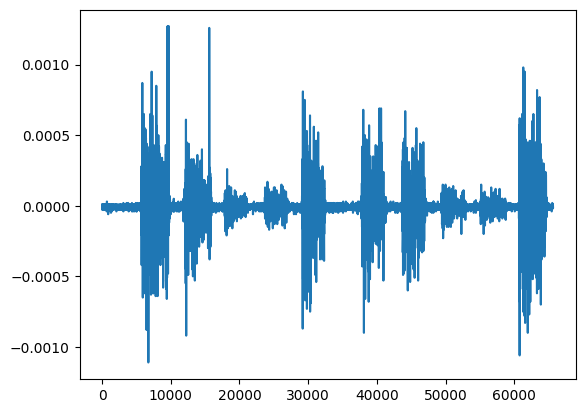

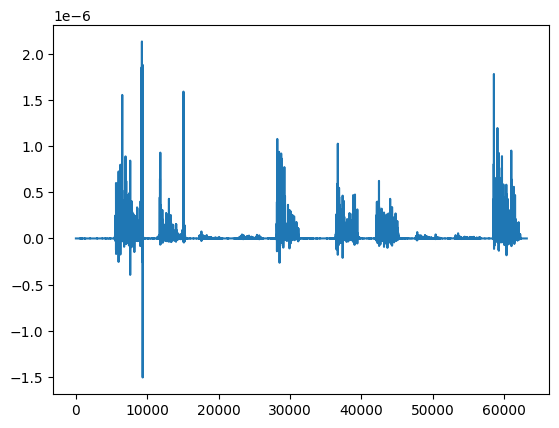

In [6]:
TKEO = tkeo(diccionario_3d[1]['channel1'])
print(TKEO)
time = np.arange(0,len(TKEO))
plt.plot(diccionario_3d[1]['time'],diccionario_3d[1]['channel1'])
plt.show()
plt.plot(time,TKEO)
plt.show()

In [7]:
def tkeo_multiple(n_canal,df):
    res_canales = np.zeros((len(df)-2, n_canal))
    for i in np.arange(1,n_canal+1):
        arreglo = np.array(df[f'channel{i}'])
        ar_tkeo = tkeo(arreglo)
        res_canales[:, i-1] = ar_tkeo
        return(res_canales)
    

In [8]:
tkeo_multiple(8,diccionario_3d[1])

array([[2.e-10, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e-10, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       ...,
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

In [9]:
def calcularRMS(X):
  N=X.size #Cantidad de puntos
  rms=(np.sum(X**(2))/N)**0.5
  return rms

In [31]:
def var_est(n_canal,df):
    res_canales = np.zeros((7,n_canal))
    estadisticas = ['RMS', 'Var', 'MAV','MAVS','SSC','WL','ZC']

    for i in np.arange(1,n_canal+1):
        arreglo = np.array(df[f'channel{i}'])
        rms = calcularRMS(arreglo)
        var = np.var(arreglo)
        mean = np.mean(np.abs(arreglo))
        mean_slope = np.mean(np.abs(np.diff(arreglo)))
        sl_sign_c = np.sum(np.abs(np.diff(np.sign(np.diff(arreglo)))))
        wl_values = np.sum(np.abs(np.diff(arreglo)))
        zero_crossings = np.sum(np.diff(np.sign(arreglo)))



        lista = [rms, var, mean, mean_slope,sl_sign_c,wl_values,zero_crossings]
        res_canales[:, i-1] = lista
    
    datos = res_canales.T
    df_estadisticas = pd.DataFrame(datos, columns=estadisticas, index=[f'Canal {i}' for i in range(1, n_canal+1)])
    return df_estadisticas

In [32]:
a = var_est(8,diccionario_3d[1])
print(a)

              RMS           Var       MAV      MAVS      SSC       WL   ZC
Canal 1  0.000144  2.075224e-08  0.000074  0.000012  11008.0  0.72746 -2.0
Canal 2  0.000134  1.782560e-08  0.000076  0.000012  11464.0  0.75085  2.0
Canal 3  0.000124  1.541604e-08  0.000073  0.000012  11608.0  0.74312  0.0
Canal 4  0.000155  2.390305e-08  0.000082  0.000013  11382.0  0.80852  0.0
Canal 5  0.000198  3.923162e-08  0.000107  0.000016  11050.0  1.02317 -1.0
Canal 6  0.000161  2.567901e-08  0.000088  0.000013  10832.0  0.82774  0.0
Canal 7  0.000134  1.780039e-08  0.000070  0.000010  10828.0  0.66229 -1.0
Canal 8  0.000142  2.022076e-08  0.000075  0.000011  10890.0  0.70037  0.0
